In [4]:
import pickle
data = pickle.load(open('./processed_MCD.b','rb'))
data.rename(columns={'pi':'label'}, inplace=True)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tqdm import tqdm_notebook as tqdm
from keras import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
%matplotlib inline

In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "1"

In [7]:
"""Building indexes"""
n = data.shape[0]
ys = list(data.label)

"""Retrieving the positive and negative indexes"""
neg_index = [k for k in range(len(ys)) if ys[k]==0]
pos_index = [k for k in range(len(ys)) if ys[k]==1]

"""Shuffling both the positive and negative indexes"""
np.random.seed(seed=0)
np.random.shuffle(neg_index)
np.random.shuffle(pos_index)

"""Computing train and test index sets for the chosen number of folds"""
cv = 10

s = len(neg_index)//cv
neg_index_list = [neg_index[k*s:(k+1)*s] for k in range(cv-1)]
neg_index_list.append(neg_index[(cv-1)*s:])
assert(np.sum([len(e) for e in neg_index_list])==len(neg_index)) # Check on negative index completion

s = len(pos_index)//cv
pos_index_list = [pos_index[k*s:(k+1)*s] for k in range(cv-1)]
pos_index_list.append(pos_index[(cv-1)*s:])
assert(np.sum([len(e) for e in pos_index_list])==len(pos_index))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           5000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 35s 2ms/step - loss: 0.2369 - categorical_accuracy: 1.0000 - val_loss: 0.0428 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1520 - categorical_accuracy: 1.0000 - val_loss: 0.0397 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1396 - categorical_accuracy: 1.0000 - val_loss: 0.0198 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1330 - categorical_accuracy: 1.0000 - val_loss: 0.0327 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6254295532646049
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_______________________

16634/16634 [==============================] - 35s 2ms/step - loss: 0.2329 - categorical_accuracy: 1.0000 - val_loss: 0.0580 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1439 - categorical_accuracy: 1.0000 - val_loss: 0.0457 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1257 - categorical_accuracy: 1.0000 - val_loss: 0.0727 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5983827493261457
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_10 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_10 (LSTM)               (None, 32)                1

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 37s 2ms/step - loss: 0.2394 - categorical_accuracy: 1.0000 - val_loss: 0.0604 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1448 - categorical_accuracy: 1.0000 - val_loss: 0.0321 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1260 - categorical_accuracy: 1.0000 - val_loss: 0.0336 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6643835616438357
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 150, 50)           75000     
______________________________________________________________

Epoch 4/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1132 - categorical_accuracy: 1.0000 - val_loss: 0.0149 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1072 - categorical_accuracy: 1.0000 - val_loss: 0.0184 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.628158844765343
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_19 (Embedding)     (None, 150, 50)           95000     
_________________________________________________________________
lstm_19 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
___________________

16634/16634 [==============================] - 33s 2ms/step - loss: 0.1079 - categorical_accuracy: 1.0000 - val_loss: 0.0292 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6067415730337079
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_23 (Embedding)     (None, 150, 50)           115000    
_________________________________________________________________
lstm_23 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_45 (Activation)   (None, 256)               0         
_________________________________________________________________
dr

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 41s 2ms/step - loss: 0.2347 - categorical_accuracy: 1.0000 - val_loss: 0.0637 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1439 - categorical_accuracy: 1.0000 - val_loss: 0.0231 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1183 - categorical_accuracy: 1.0000 - val_loss: 0.0273 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6106870229007634
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_28 (Embedding)     (None, 150, 50)           140000    
______________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_31 (Embedding)     (None, 150, 50)           5000      
_________________________________________________________________
lstm_31 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_61 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 43s 3ms/step - loss: 0.2403 - categorical_accuracy: 1.0000 - val_loss: 0.0806 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1545 - categorical_accuracy: 1.0000 - val_loss: 0.0454 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1387 - categorical_accuracy: 1.0000 - val_loss: 0.0502 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.586894586894587
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_36 (Embedding)     (None, 150, 50)           30000     
_______________________________________________________________

F1-score on current fold : 0.5321637426900585
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_40 (Embedding)     (None, 150, 50)           50000     
_________________________________________________________________
lstm_40 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_79 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (

16634/16634 [==============================] - 33s 2ms/step - loss: 0.1389 - categorical_accuracy: 1.0000 - val_loss: 0.0345 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1186 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5830903790087463
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_44 (Embedding)     (None, 150, 50)           70000     
_________________________________________________________________
lstm_44 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_____________________________

16634/16634 [==============================] - 47s 3ms/step - loss: 0.2338 - categorical_accuracy: 1.0000 - val_loss: 0.0298 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1392 - categorical_accuracy: 1.0000 - val_loss: 0.0224 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1200 - categorical_accuracy: 1.0000 - val_loss: 0.0203 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1076 - categorical_accuracy: 1.0000 - val_loss: 0.0191 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1003 - categorical_accuracy: 1.0000 - val_loss: 0.0185 - val_categorical_accuracy: 1.0000
Epoch 6/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.0950 - categorical_accuracy: 1.0000 - val_loss: 0.0122 - val_categorical_ac

16634/16634 [==============================] - 48s 3ms/step - loss: 0.2347 - categorical_accuracy: 1.0000 - val_loss: 0.0586 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1394 - categorical_accuracy: 1.0000 - val_loss: 0.0313 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1174 - categorical_accuracy: 1.0000 - val_loss: 0.0668 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5826330532212886
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_52 (Embedding)     (None, 150, 50)           110000    
_________________________________________________________________
lstm_52 (LSTM)               (None, 32)                1

16634/16634 [==============================] - 33s 2ms/step - loss: 0.1416 - categorical_accuracy: 1.0000 - val_loss: 0.0319 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1189 - categorical_accuracy: 1.0000 - val_loss: 0.0303 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1055 - categorical_accuracy: 1.0000 - val_loss: 0.0358 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5882352941176472
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_56 (Embedding)     (None, 150, 50)           130000    
_________________________________________________________________
lstm_56 (LSTM)               (None, 32)                1

16634/16634 [==============================] - 52s 3ms/step - loss: 0.2354 - categorical_accuracy: 1.0000 - val_loss: 0.0328 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1368 - categorical_accuracy: 1.0000 - val_loss: 0.0248 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1163 - categorical_accuracy: 1.0000 - val_loss: 0.0593 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5977653631284917
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_60 (Embedding)     (None, 150, 50)           150000    
_________________________________________________________________
lstm_60 (LSTM)               (None, 32)                1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_61 (Embedding)     (None, 150, 50)           5000      
_________________________________________________________________
lstm_61 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_121 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 54s 3ms/step - loss: 0.2411 - categorical_accuracy: 1.0000 - val_loss: 0.0642 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1573 - categorical_accuracy: 1.0000 - val_loss: 0.0341 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1427 - categorical_accuracy: 1.0000 - val_loss: 0.0645 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6258064516129033
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_66 (Embedding)     (None, 150, 50)           30000     
______________________________________________________________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 56s 3ms/step - loss: 0.2352 - categorical_accuracy: 1.0000 - val_loss: 0.0383 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1455 - categorical_accuracy: 1.0000 - val_loss: 0.0346 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1264 - categorical_accuracy: 1.0000 - val_loss: 0.0212 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1170 - categorical_accuracy: 1.0000 - val_loss: 0.0334 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6645962732919255
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_______________________

16634/16634 [==============================] - 58s 3ms/step - loss: 0.2399 - categorical_accuracy: 1.0000 - val_loss: 0.0658 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1426 - categorical_accuracy: 1.0000 - val_loss: 0.0155 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1227 - categorical_accuracy: 1.0000 - val_loss: 0.0218 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5873015873015872
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_74 (Embedding)     (None, 150, 50)           70000     
_________________________________________________________________
lstm_74 (LSTM)               (None, 32)                1

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 59s 4ms/step - loss: 0.2376 - categorical_accuracy: 1.0000 - val_loss: 0.0280 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1446 - categorical_accuracy: 1.0000 - val_loss: 0.0510 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6204620462046204
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_78 (Embedding)     (None, 150, 50)           90000     
_________________________________________________________________
lstm_78 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None,

16634/16634 [==============================] - 62s 4ms/step - loss: 0.2378 - categorical_accuracy: 1.0000 - val_loss: 0.0549 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1405 - categorical_accuracy: 1.0000 - val_loss: 0.0370 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1200 - categorical_accuracy: 1.0000 - val_loss: 0.0331 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1073 - categorical_accuracy: 1.0000 - val_loss: 0.0252 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.0975 - categorical_accuracy: 1.0000 - val_loss: 0.0190 - val_categorical_accuracy: 1.0000
Epoch 6/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.0920 - categorical_accuracy: 1.0000 - val_loss: 0.0130 - val_categorical_ac

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 63s 4ms/step - loss: 0.2365 - categorical_accuracy: 1.0000 - val_loss: 0.0356 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1414 - categorical_accuracy: 1.0000 - val_loss: 0.0400 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.64576802507837
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_86 (Embedding)     (None, 150, 50)           130000    
_________________________________________________________________
lstm_86 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 2

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 66s 4ms/step - loss: 0.2371 - categorical_accuracy: 1.0000 - val_loss: 0.0122 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1447 - categorical_accuracy: 1.0000 - val_loss: 0.0467 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.637223974763407
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_90 (Embedding)     (None, 150, 50)           150000    
_________________________________________________________________
lstm_90 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_91 (Embedding)     (None, 150, 50)           5000      
_________________________________________________________________
lstm_91 (LSTM)               (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_181 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_91 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 66s 4ms/step - loss: 0.2375 - categorical_accuracy: 1.0000 - val_loss: 0.1044 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1544 - categorical_accuracy: 1.0000 - val_loss: 0.0371 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1417 - categorical_accuracy: 1.0000 - val_loss: 0.0414 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.644736842105263
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_96 (Embedding)     (None, 150, 50)           30000     
_______________________________________________________________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 69s 4ms/step - loss: 0.2447 - categorical_accuracy: 1.0000 - val_loss: 0.0414 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1471 - categorical_accuracy: 1.0000 - val_loss: 0.0511 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6449511400651466
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_101 (Embedding)    (None, 150, 50)           55000     
_________________________________________________________________
lstm_101 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None,

Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1217 - categorical_accuracy: 1.0000 - val_loss: 0.0223 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6570397111913359
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_105 (Embedding)    (None, 150, 50)           75000     
_________________________________________________________________
lstm_105 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_209 (Activation)  (None, 256)               0         
_________________________________________________________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 73s 4ms/step - loss: 0.2370 - categorical_accuracy: 1.0000 - val_loss: 0.0171 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1419 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.64
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_109 (Embedding)    (None, 150, 50)           95000     
_________________________________________________________________
lstm_109 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)         

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 75s 4ms/step - loss: 0.2442 - categorical_accuracy: 1.0000 - val_loss: 0.0481 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1452 - categorical_accuracy: 1.0000 - val_loss: 0.0314 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1197 - categorical_accuracy: 1.0000 - val_loss: 0.0218 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1051 - categorical_accuracy: 1.0000 - val_loss: 0.0265 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6423357664233577
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_______________________

Epoch 2/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1359 - categorical_accuracy: 1.0000 - val_loss: 0.0500 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6347305389221558
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_117 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_117 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_233 (Activation)  (None, 256)               0         
_________________________________________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_121 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_121 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_241 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_121 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 80s 5ms/step - loss: 0.2306 - categorical_accuracy: 1.0000 - val_loss: 0.0377 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1498 - categorical_accuracy: 1.0000 - val_loss: 0.0427 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6219081272084805
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_126 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
lstm_126 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None,

F1-score on current fold : 0.688427299703264
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_130 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_130 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_259 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_130 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (N

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_134 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_134 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_267 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_134 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 88s 5ms/step - loss: 0.2394 - categorical_accuracy: 1.0000 - val_loss: 0.0297 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1459 - categorical_accuracy: 1.0000 - val_loss: 0.0278 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1214 - categorical_accuracy: 1.0000 - val_loss: 0.0209 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1094 - categorical_accuracy: 1.0000 - val_loss: 0.0270 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6754098360655737
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_______________________

Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1179 - categorical_accuracy: 1.0000 - val_loss: 0.0191 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6666666666666666
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_143 (Embedding)    (None, 150, 50)           115000    
_________________________________________________________________
lstm_143 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_285 (Activation)  (None, 256)               0         
_________________________________________________________

16634/16634 [==============================] - 33s 2ms/step - loss: 0.0966 - categorical_accuracy: 1.0000 - val_loss: 0.0204 - val_categorical_accuracy: 1.0000
Epoch 6/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.0924 - categorical_accuracy: 1.0000 - val_loss: 0.0304 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6837060702875399
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_147 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_147 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_____________________________

16634/16634 [==============================] - 33s 2ms/step - loss: 0.1049 - categorical_accuracy: 1.0000 - val_loss: 0.0092 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 34s 2ms/step - loss: 0.1002 - categorical_accuracy: 1.0000 - val_loss: 0.0370 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6601307189542485


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_151 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_151 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_301 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_151 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 96s 6ms/step - loss: 0.2337 - categorical_accuracy: 1.0000 - val_loss: 0.0274 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1542 - categorical_accuracy: 1.0000 - val_loss: 0.0149 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 33s 2ms/step - loss: 0.1381 - categorical_accuracy: 1.0000 - val_loss: 0.0268 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5839416058394161
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_156 (Embedding)    (None, 150, 50)           30000     
______________________________________________________________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 88s 5ms/step - loss: 0.2358 - categorical_accuracy: 1.0000 - val_loss: 0.0393 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1450 - categorical_accuracy: 1.0000 - val_loss: 0.0138 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1272 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6397306397306397
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_160 (Embedding)    (None, 150, 50)           50000     
______________________________________________________________

Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1438 - categorical_accuracy: 1.0000 - val_loss: 0.0298 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1257 - categorical_accuracy: 1.0000 - val_loss: 0.0143 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1145 - categorical_accuracy: 1.0000 - val_loss: 0.0222 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6030534351145037
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_164 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_164 (LSTM)              (None, 32)      

16634/16634 [==============================] - 30s 2ms/step - loss: 0.1476 - categorical_accuracy: 1.0000 - val_loss: 0.0423 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5527272727272728
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_168 (Embedding)    (None, 150, 50)           90000     
_________________________________________________________________
lstm_168 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_335 (Activation)  (None, 256)               0         
_________________________________________________________________
dr

16634/16634 [==============================] - 31s 2ms/step - loss: 0.1437 - categorical_accuracy: 1.0000 - val_loss: 0.0236 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1225 - categorical_accuracy: 1.0000 - val_loss: 0.0163 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1089 - categorical_accuracy: 1.0000 - val_loss: 0.0255 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6501766784452296
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_172 (Embedding)    (None, 150, 50)           110000    
_________________________________________________________________
lstm_172 (LSTM)              (None, 32)                1

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_176 (Embedding)    (None, 150, 50)           130000    
_________________________________________________________________
lstm_176 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_351 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_176 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 100s 6ms/step - loss: 0.2316 - categorical_accuracy: 1.0000 - val_loss: 0.0204 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1385 - categorical_accuracy: 1.0000 - val_loss: 0.0213 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.5238095238095238


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_181 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_181 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_361 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_181 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 101s 6ms/step - loss: 0.2357 - categorical_accuracy: 1.0000 - val_loss: 0.0672 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1518 - categorical_accuracy: 1.0000 - val_loss: 0.0381 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1386 - categorical_accuracy: 1.0000 - val_loss: 0.0476 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6707317073170732
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_186 (Embedding)    (None, 150, 50)           30000     
_____________________________________________________________

Epoch 3/10
16634/16634 [==============================] - 30s 2ms/step - loss: 0.1275 - categorical_accuracy: 1.0000 - val_loss: 0.0310 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1178 - categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6951219512195123
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_190 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_190 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
__________________

16634/16634 [==============================] - 31s 2ms/step - loss: 0.1225 - categorical_accuracy: 1.0000 - val_loss: 0.0286 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.686084142394822
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_194 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_194 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_387 (Activation)  (None, 256)               0         
_________________________________________________________________
dro

16634/16634 [==============================] - 109s 7ms/step - loss: 0.2392 - categorical_accuracy: 1.0000 - val_loss: 0.0846 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 30s 2ms/step - loss: 0.1448 - categorical_accuracy: 1.0000 - val_loss: 0.0417 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1233 - categorical_accuracy: 1.0000 - val_loss: 0.0354 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1131 - categorical_accuracy: 1.0000 - val_loss: 0.0261 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1067 - categorical_accuracy: 1.0000 - val_loss: 0.0315 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6583072100313481
_________________________________________________________________
Layer (type)                 Output Shape  

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 109s 7ms/step - loss: 0.2386 - categorical_accuracy: 1.0000 - val_loss: 0.0280 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1498 - categorical_accuracy: 1.0000 - val_loss: 0.0209 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1252 - categorical_accuracy: 1.0000 - val_loss: 0.0214 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6526315789473683
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_202 (Embedding)    (None, 150, 50)           110000    
_____________________________________________________________

16634/16634 [==============================] - 112s 7ms/step - loss: 0.2347 - categorical_accuracy: 1.0000 - val_loss: 0.0301 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1469 - categorical_accuracy: 1.0000 - val_loss: 0.0351 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6190476190476192
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_206 (Embedding)    (None, 150, 50)           130000    
_________________________________________________________________
lstm_206 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
____________________________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_210 (Embedding)    (None, 150, 50)           150000    
_________________________________________________________________
lstm_210 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_419 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_210 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_211 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_211 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_421 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_211 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

16634/16634 [==============================] - 31s 2ms/step - loss: 0.1278 - categorical_accuracy: 1.0000 - val_loss: 0.0310 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6616541353383459
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_215 (Embedding)    (None, 150, 50)           25000     
_________________________________________________________________
lstm_215 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_429 (Activation)  (None, 256)               0         
_________________________________________________________________
dr

16634/16634 [==============================] - 119s 7ms/step - loss: 0.2337 - categorical_accuracy: 1.0000 - val_loss: 0.0477 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1390 - categorical_accuracy: 1.0000 - val_loss: 0.0257 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1215 - categorical_accuracy: 1.0000 - val_loss: 0.0236 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1150 - categorical_accuracy: 1.0000 - val_loss: 0.0202 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1097 - categorical_accuracy: 1.0000 - val_loss: 0.0421 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6907894736842106
_________________________________________________________________
Layer (type)                 Output Shape  

16634/16634 [==============================] - 118s 7ms/step - loss: 0.2315 - categorical_accuracy: 1.0000 - val_loss: 0.0441 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1423 - categorical_accuracy: 1.0000 - val_loss: 0.0299 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1239 - categorical_accuracy: 1.0000 - val_loss: 0.0221 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1131 - categorical_accuracy: 1.0000 - val_loss: 0.0204 - val_categorical_accuracy: 1.0000
Epoch 5/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1081 - categorical_accuracy: 1.0000 - val_loss: 0.0271 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6688524590163935
_________________________________________________________________
Layer (type)                 Output Shape  

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 121s 7ms/step - loss: 0.2359 - categorical_accuracy: 1.0000 - val_loss: 0.0366 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1389 - categorical_accuracy: 1.0000 - val_loss: 0.0227 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1223 - categorical_accuracy: 1.0000 - val_loss: 0.0253 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6713286713286714
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_227 (Embedding)    (None, 150, 50)           85000     
_____________________________________________________________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 123s 7ms/step - loss: 0.2418 - categorical_accuracy: 1.0000 - val_loss: 0.0547 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1438 - categorical_accuracy: 1.0000 - val_loss: 0.0157 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1213 - categorical_accuracy: 1.0000 - val_loss: 0.0265 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6983050847457627
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_231 (Embedding)    (None, 150, 50)           105000    
_____________________________________________________________

Epoch 2/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1375 - categorical_accuracy: 1.0000 - val_loss: 0.0240 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1178 - categorical_accuracy: 1.0000 - val_loss: 0.0323 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6804123711340206
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_235 (Embedding)    (None, 150, 50)           125000    
_________________________________________________________________
lstm_235 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
__________________

16634/16634 [==============================] - 131s 8ms/step - loss: 0.2352 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1386 - categorical_accuracy: 1.0000 - val_loss: 0.0288 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1170 - categorical_accuracy: 1.0000 - val_loss: 0.0455 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6568047337278107
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_239 (Embedding)    (None, 150, 50)           145000    
_________________________________________________________________
lstm_239 (LSTM)              (None, 32)                

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_241 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_241 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_481 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_241 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 132s 8ms/step - loss: 0.2389 - categorical_accuracy: 1.0000 - val_loss: 0.0335 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1594 - categorical_accuracy: 1.0000 - val_loss: 0.0665 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.598639455782313
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_246 (Embedding)    (None, 150, 50)           30000     
_________________________________________________________________
lstm_246 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None,

F1-score on current fold : 0.6124031007751938
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_250 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_250 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_499 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_250 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 134s 8ms/step - loss: 0.2359 - categorical_accuracy: 1.0000 - val_loss: 0.0857 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1415 - categorical_accuracy: 1.0000 - val_loss: 0.0306 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1224 - categorical_accuracy: 1.0000 - val_loss: 0.0370 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6762589928057553
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_254 (Embedding)    (None, 150, 50)           70000     
_____________________________________________________________

Train on 16634 samples, validate on 4159 samples
Epoch 1/10
16634/16634 [==============================] - 138s 8ms/step - loss: 0.2329 - categorical_accuracy: 1.0000 - val_loss: 0.0331 - val_categorical_accuracy: 1.0000
Epoch 2/10
16634/16634 [==============================] - 32s 2ms/step - loss: 0.1429 - categorical_accuracy: 1.0000 - val_loss: 0.0463 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6407766990291263
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_258 (Embedding)    (None, 150, 50)           90000     
_________________________________________________________________
lstm_258 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None

Epoch 2/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1468 - categorical_accuracy: 1.0000 - val_loss: 0.0362 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1229 - categorical_accuracy: 1.0000 - val_loss: 0.0265 - val_categorical_accuracy: 1.0000
Epoch 4/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1086 - categorical_accuracy: 1.0000 - val_loss: 0.0431 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6712328767123288
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_262 (Embedding)    (None, 150, 50)           110000    
_________________________________________________________________
lstm_262 (LSTM)              (None, 32)      

16634/16634 [==============================] - 31s 2ms/step - loss: 0.1440 - categorical_accuracy: 1.0000 - val_loss: 0.0314 - val_categorical_accuracy: 1.0000
Epoch 3/10
16634/16634 [==============================] - 31s 2ms/step - loss: 0.1180 - categorical_accuracy: 1.0000 - val_loss: 0.0320 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6550522648083623
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_266 (Embedding)    (None, 150, 50)           130000    
_________________________________________________________________
lstm_266 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_____________________________

16634/16634 [==============================] - 32s 2ms/step - loss: 0.1069 - categorical_accuracy: 1.0000 - val_loss: 0.0312 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6576271186440678
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_270 (Embedding)    (None, 150, 50)           150000    
_________________________________________________________________
lstm_270 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_539 (Activation)  (None, 256)               0         
_________________________________________________________________
dr

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_271 (Embedding)    (None, 150, 50)           5000      
_________________________________________________________________
lstm_271 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_541 (Activation)  (None, 256)               0         
_________________________________________________________________
dropout_271 (Dropout)        (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

Train on 16624 samples, validate on 4157 samples
Epoch 1/10
16624/16624 [==============================] - 147s 9ms/step - loss: 0.2349 - categorical_accuracy: 1.0000 - val_loss: 0.0333 - val_categorical_accuracy: 1.0000
Epoch 2/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1540 - categorical_accuracy: 1.0000 - val_loss: 0.0236 - val_categorical_accuracy: 1.0000
Epoch 3/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1386 - categorical_accuracy: 1.0000 - val_loss: 0.0971 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6394984326018809
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_276 (Embedding)    (None, 150, 50)           30000     
_____________________________________________________________

16624/16624 [==============================] - 149s 9ms/step - loss: 0.2397 - categorical_accuracy: 1.0000 - val_loss: 0.0334 - val_categorical_accuracy: 1.0000
Epoch 2/10
16624/16624 [==============================] - 32s 2ms/step - loss: 0.1455 - categorical_accuracy: 1.0000 - val_loss: 0.0189 - val_categorical_accuracy: 1.0000
Epoch 3/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1277 - categorical_accuracy: 1.0000 - val_loss: 0.0469 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6857142857142857
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_280 (Embedding)    (None, 150, 50)           50000     
_________________________________________________________________
lstm_280 (LSTM)              (None, 32)                

16624/16624 [==============================] - 31s 2ms/step - loss: 0.1425 - categorical_accuracy: 1.0000 - val_loss: 0.0287 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6490066225165564
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_284 (Embedding)    (None, 150, 50)           70000     
_________________________________________________________________
lstm_284 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
_________________________________________________________________
activation_567 (Activation)  (None, 256)               0         
_________________________________________________________________
dr

Train on 16624 samples, validate on 4157 samples
Epoch 1/10
16624/16624 [==============================] - 155s 9ms/step - loss: 0.2286 - categorical_accuracy: 1.0000 - val_loss: 0.0590 - val_categorical_accuracy: 1.0000
Epoch 2/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1392 - categorical_accuracy: 1.0000 - val_loss: 0.0400 - val_categorical_accuracy: 1.0000
Epoch 3/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1198 - categorical_accuracy: 1.0000 - val_loss: 0.0348 - val_categorical_accuracy: 1.0000
Epoch 4/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1089 - categorical_accuracy: 1.0000 - val_loss: 0.0211 - val_categorical_accuracy: 1.0000
Epoch 5/10
16624/16624 [==============================] - 32s 2ms/step - loss: 0.1017 - categorical_accuracy: 1.0000 - val_loss: 0.0557 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6700767263427111
_________________________________________________

16624/16624 [==============================] - 161s 10ms/step - loss: 0.2345 - categorical_accuracy: 1.0000 - val_loss: 0.0271 - val_categorical_accuracy: 1.0000
Epoch 2/10
16624/16624 [==============================] - 31s 2ms/step - loss: 0.1384 - categorical_accuracy: 1.0000 - val_loss: 0.0365 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6254071661237784
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_293 (Embedding)    (None, 150, 50)           115000    
_________________________________________________________________
lstm_293 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               8448      
___________________________

Train on 16624 samples, validate on 4157 samples
Epoch 1/10
16624/16624 [==============================] - 163s 10ms/step - loss: 0.2433 - categorical_accuracy: 1.0000 - val_loss: 0.0728 - val_categorical_accuracy: 1.0000
Epoch 2/10
16624/16624 [==============================] - 32s 2ms/step - loss: 0.1455 - categorical_accuracy: 1.0000 - val_loss: 0.0810 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6541554959785523
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_297 (Embedding)    (None, 150, 50)           135000    
_________________________________________________________________
lstm_297 (LSTM)              (None, 32)                10624     
_________________________________________________________________
FC1 (Dense)                  (Non

Train on 16624 samples, validate on 4157 samples
Epoch 1/10
16624/16624 [==============================] - 166s 10ms/step - loss: 0.2380 - categorical_accuracy: 1.0000 - val_loss: 0.0357 - val_categorical_accuracy: 1.0000
Epoch 2/10
16624/16624 [==============================] - 32s 2ms/step - loss: 0.1417 - categorical_accuracy: 1.0000 - val_loss: 0.0277 - val_categorical_accuracy: 1.0000
Epoch 3/10
16624/16624 [==============================] - 32s 2ms/step - loss: 0.1180 - categorical_accuracy: 1.0000 - val_loss: 0.0359 - val_categorical_accuracy: 1.0000
F1-score on current fold : 0.6601941747572816



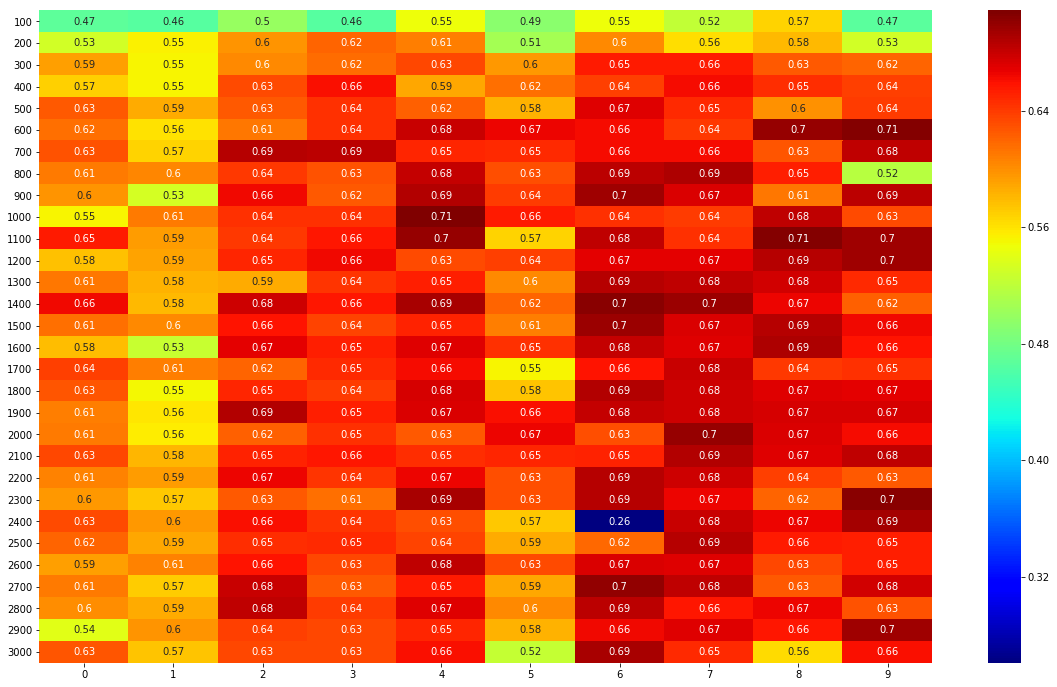

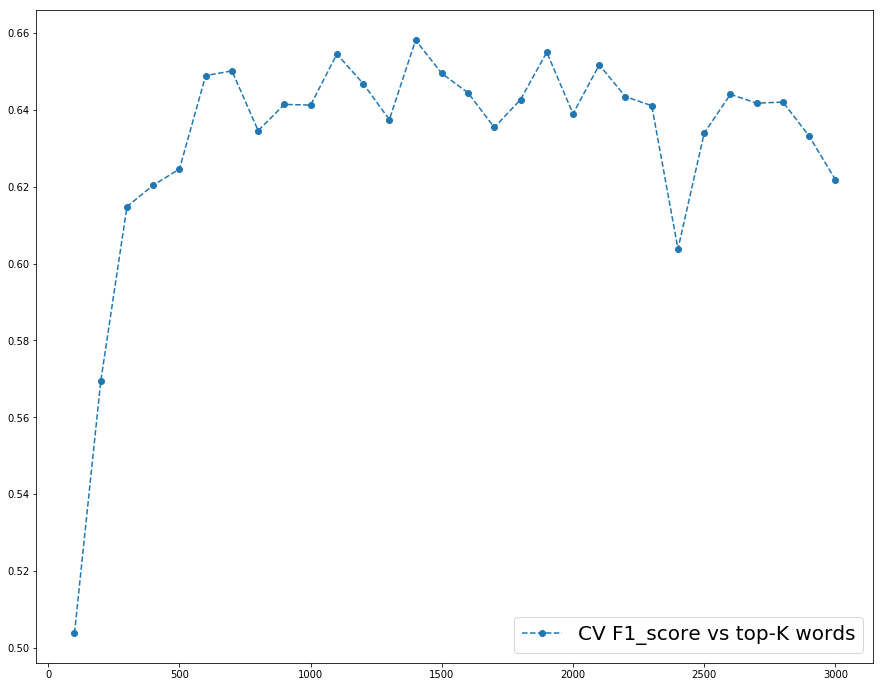

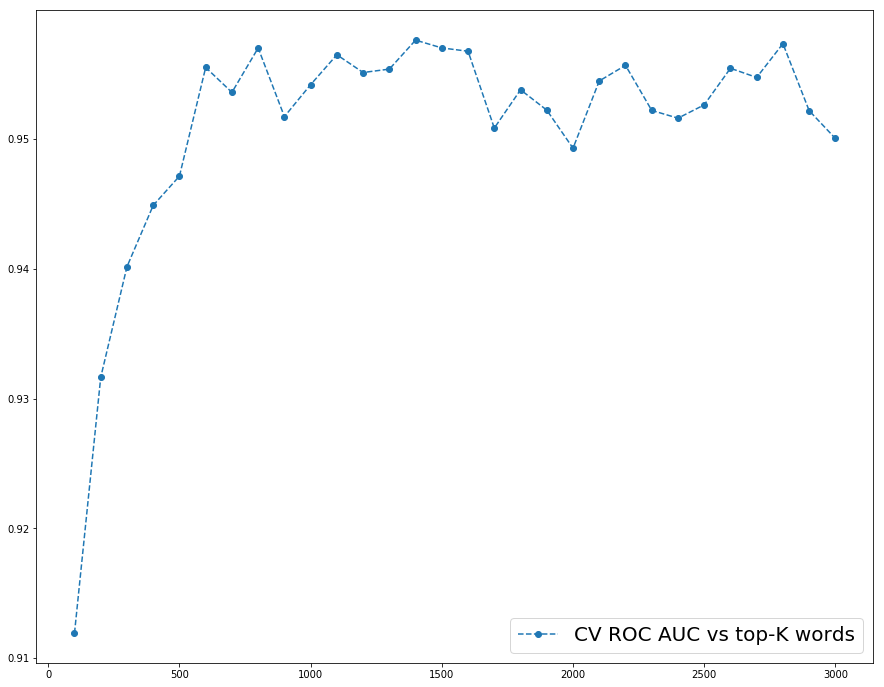

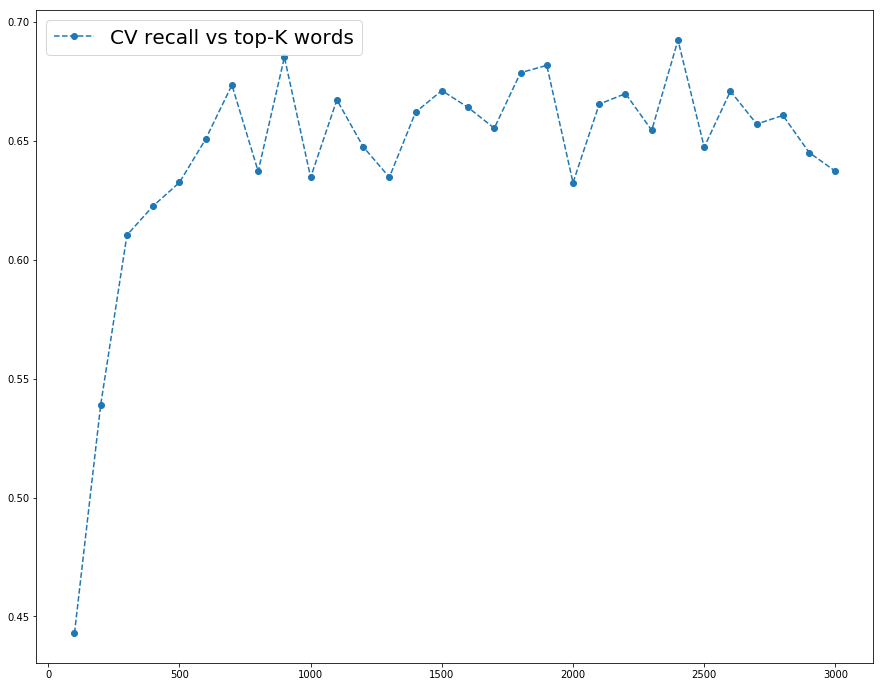

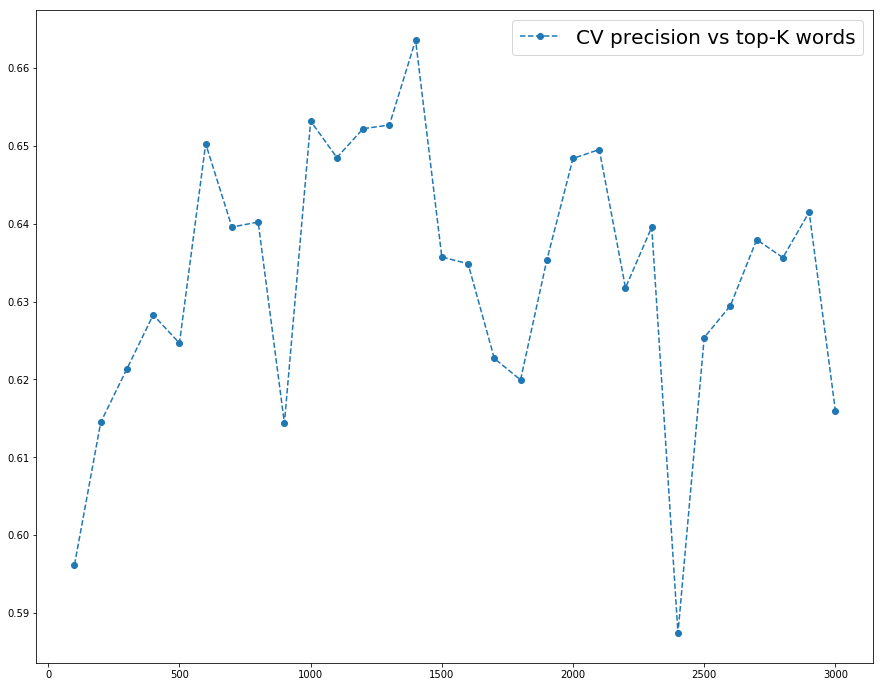

In [10]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(32)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

cv = 10
quotas = list(range(100,3100,100))

f_scores = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}
precisions = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}
recalls = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}
aucs = {k: {max_words: 0. for max_words in quotas} for k in range(cv)}

for k in tqdm(range(cv)):
    """Splitting the data"""
    pos_test = pos_index_list[k]
    neg_test = neg_index_list[k]
    pos_train = list(set(pos_index).difference(pos_test))
    neg_train = list(set(neg_index).difference(neg_test))
    
    X_train = list(data.text.iloc[pos_train]) + list(data.text.iloc[neg_train])
    Y_train = list(data.label.iloc[pos_train]) + list(data.label.iloc[neg_train])
    
    X_test = list(data.text.iloc[pos_test]) + list(data.text.iloc[neg_test])
    Y_test = list(data.label.iloc[pos_test]) + list(data.label.iloc[neg_test])
    
    for max_words in tqdm(quotas):
        """Initializing the model parameters"""
        max_len = 150
        tok = Tokenizer(num_words=max_words)
        tok.fit_on_texts(X_train)
        sequences = tok.texts_to_sequences(X_train)
        sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

        """Initializing the model"""
        model = RNN()
        model.summary()
        model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=[metrics.categorical_accuracy])

        """Training the model"""
        model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
              validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

        """Testing the model"""
        test_sequences = tok.texts_to_sequences(X_test)
        test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
        preds = model.predict(test_sequences_matrix)
        preds = preds.reshape(-1,)
        f_scores[k][max_words] = f1_score(Y_test, [int(p>0.5) for p in preds])
        precisions[k][max_words] = precision_score(Y_test, [int(p>0.5) for p in preds])
        recalls[k][max_words] = recall_score(Y_test, [int(p>0.5) for p in preds])
        aucs[k][max_words] = roc_auc_score(Y_test, preds)
        print('F1-score on current fold : {}'.format(f_scores[k][max_words]))
        
        
f_scores = pd.DataFrame(f_scores)

plt.figure(figsize=(20,12))
sns.heatmap(f_scores, cmap='jet', annot=True)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(f_scores.T.apply(np.mean), 'o--', label='CV F1_score vs top-K words')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(pd.DataFrame(aucs).T.apply(np.mean), 'o--', label='CV ROC AUC vs top-K words')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(pd.DataFrame(recalls).T.apply(np.mean), 'o--', label='CV recall vs top-K words')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(15,12))
plt.plot(pd.DataFrame(precisions).T.apply(np.mean), 'o--', label='CV precision vs top-K words')
plt.legend(fontsize=20)
plt.show()

In [17]:
f_scores.T.apply(np.mean)

100     0.503800
200     0.569376
300     0.614877
400     0.620421
500     0.624644
600     0.648969
700     0.650210
800     0.634649
900     0.641474
1000    0.641296
1100    0.654568
1200    0.646914
1300    0.637498
1400    0.658208
1500    0.649522
1600    0.644479
1700    0.635466
1800    0.642739
1900    0.655051
2000    0.639031
2100    0.651775
2200    0.643481
2300    0.641154
2400    0.603835
2500    0.634012
2600    0.644105
2700    0.641785
2800    0.642088
2900    0.633215
3000    0.621860
dtype: float64

In [23]:
print("Precision : {}".format(pd.DataFrame(precisions).loc[1400].mean()))
print("Recall : {}".format(pd.DataFrame(recalls).loc[1400].mean()))
print("F1 score : {}".format(pd.DataFrame(f_scores).loc[1400].mean()))
print("ROC AUC : {}".format(pd.DataFrame(aucs).loc[1400].mean()))

Precision : 0.6635774360100214
Recall : 0.6620933034945773
F1 score : 0.6582083457964248
ROC AUC : 0.95760994889011
